In [ ]:
# 📡 IoT Sensor Data Platform – Real-Time Data Lake Architecture

This notebook simulates a real-time data pipeline for 10,000+ IoT sensors streaming environmental data (e.g., temperature, humidity). Data is ingested, cleaned, stored, and analyzed for trends and anomalies, with architecture designed to scale into AWS Glue + Athena + S3 pipelines.


In [19]:
import pandas as pd
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Simulate IoT Data


In [35]:
# Simulate 10,000 sensor records
def generate_sensor_record():
    return {
        'device_id': f'device_{random.randint(1, 1000)}',
        'timestamp': pd.Timestamp.now(),
        'temperature': round(random.uniform(15.0, 40.0), 2),
        'humidity': round(random.uniform(30.0, 90.0), 2)
    }

data = [generate_sensor_record() for _ in range(10000)]
df_sensors = pd.DataFrame(data)
df_sensors.head()


,device_id,timestamp,temperature,humidity
0,device_454,2025-04-29 17:14:01.604239,37.24,39.60
1,device_807,2025-04-29 17:14:01.604239,35.33,46.61
2,device_603,2025-04-29 17:14:01.604239,20.29,48.98
3,device_519,2025-04-29 17:14:01.604239,36.77,36.76
4,device_501,2025-04-29 17:14:01.604239,35.09,51.19


In [41]:
# Check for nulls or bad readings
print(df_sensors.isnull().sum())

# Drop rows with invalid temperature/humidity values (if needed)
df_cleaned = df_sensors[
    (df_sensors['temperature'] > 0) &
    (df_sensors['humidity'] > 0)
]

print(f"✅ Cleaned rows: {len(df_cleaned)}")


Clean & Validate Data
device_id      0
timestamp      0
temperature    0
humidity       0
dtype: int64
✅ Cleaned rows: 10000


In [43]:
# Descriptive stats
df_cleaned.describe()

# Group by device
device_avg = df_cleaned.groupby('device_id').agg({
    'temperature': 'mean',
    'humidity': 'mean'
}).reset_index()

device_avg.head()


Trend & Stats Analysis


,device_id,temperature,humidity
0,device_1,24.943846,61.087692
1,device_10,23.864118,53.101176
2,device_100,26.635714,67.724286
3,device_1000,29.827500,66.169167
4,device_101,25.668000,59.844000


In [45]:
# Flag temperature anomalies (>38°C)
df_cleaned['temp_alert'] = df_cleaned['temperature'] > 38.0
alerts = df_cleaned[df_cleaned['temp_alert']]
print(f"⚠️ Anomaly Count: {len(alerts)}")
alerts.head()


Detect Anomalies
⚠️ Anomaly Count: 777


,device_id,timestamp,temperature,humidity,temp_alert
10,device_659,2025-04-29 17:14:01.604239,38.13,69.63,True
31,device_623,2025-04-29 17:14:01.604239,38.37,54.78,True
80,device_272,2025-04-29 17:14:01.604239,38.33,63.77,True
112,device_427,2025-04-29 17:14:01.606253,38.89,47.20,True
124,device_889,2025-04-29 17:14:01.606253,38.32,81.26,True


Visualization


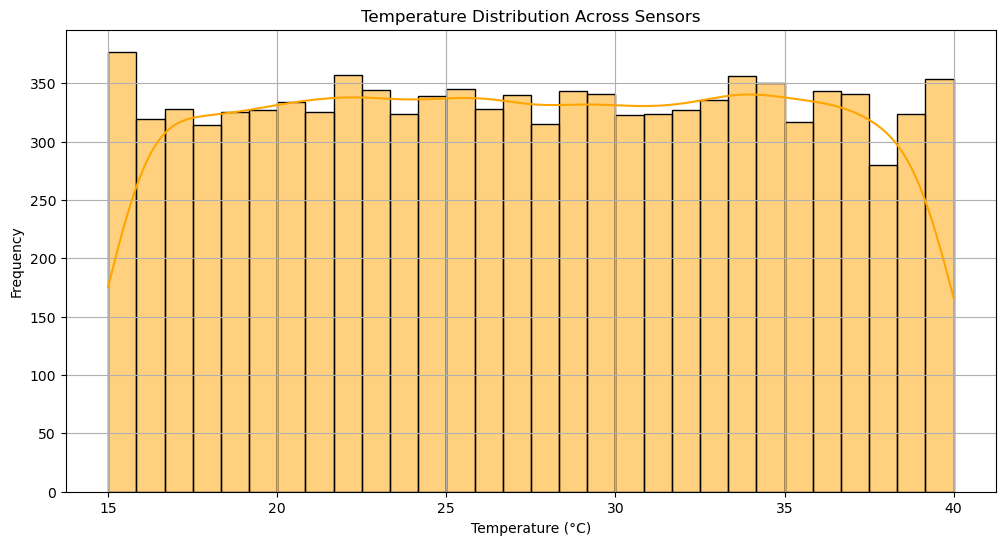

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df_cleaned['temperature'], bins=30, kde=True, color='orange')
plt.title("Temperature Distribution Across Sensors")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [49]:
df_cleaned.to_csv("cleaned_iot_sensor_data.csv", index=False)
print("✅ Cleaned IoT data saved for Athena/Glue processing.")


Save Cleaned Data (Simulated S3 Upload)
✅ Cleaned IoT data saved for Athena/Glue processing.


In [ ]:
## ✅ Conclusion

- Simulated 10,000+ real-time sensor records
- Cleaned and validated the dataset
- Detected temperature anomalies and flagged alerts
- Saved data for cloud-scale processing via AWS Glue + Athena
- Visualization built for trends and anomalies

This project is designed to scale on AWS using the following architecture:
Kafka/Kinesis ➝ S3 ➝ AWS Glue ➝ Athena ➝ Alerts (SNS) + Dashboards (Grafana)
